# **Import Library**

In [2]:
import gdown
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# **Data Loading**

In [3]:
url = 'https://drive.google.com/uc?id=1UcIf37Wi-ebSDr_ZMmRfxBE2ENflblV8'
output = 'diabetes.csv'

gdown.download(url, output, quiet=False)

df = pd.read_csv(output)

df.head()

Downloading...
From: https://drive.google.com/uc?id=1UcIf37Wi-ebSDr_ZMmRfxBE2ENflblV8
To: /content/diabetes.csv
100%|██████████| 4.00k/4.00k [00:00<00:00, 9.36MB/s]


,Number,Sex,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
0,1,M,43.2555,30.8421,25.9025,6.3,Yes
1,2,F,45.6033,28.1900,26.2067,13.5,No
2,3,F,45.0107,28.9677,26.0215,11.7,No
3,4,F,44.5398,28.9899,26.4703,13.5,No
4,5,M,43.2870,30.6972,26.0158,12.4,No


# **Exploratory Data Analysis**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Number        104 non-null    int64  
 1   Sex           104 non-null    object 
 2   %Red Pixel    104 non-null    float64
 3   %Green pixel  104 non-null    float64
 4   %Blue pixel   104 non-null    float64
 5   Hb            104 non-null    float64
 6   Anaemic       104 non-null    object 
dtypes: float64(4), int64(1), object(2)
memory usage: 5.8+ KB


In [5]:
df.describe()

,Number,%Red Pixel,%Green pixel,%Blue pixel,Hb
count,104.000000,104.000000,104.000000,104.000000,104.000000
mean,52.500000,45.654175,28.875507,25.470325,12.150962
std,30.166206,2.816294,1.554275,1.984671,2.512957
min,1.000000,38.796800,25.140300,19.541300,2.800000
25%,26.750000,43.911375,27.871300,24.896425,10.650000
50%,52.500000,45.385350,28.948750,25.953200,12.600000
75%,78.250000,46.968325,29.887275,26.721600,14.000000
max,104.000000,54.647800,32.368100,29.841400,16.300000


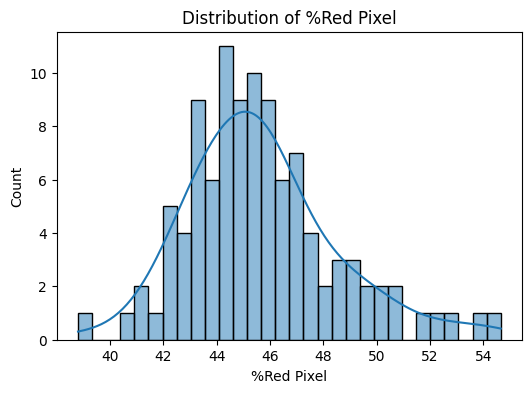

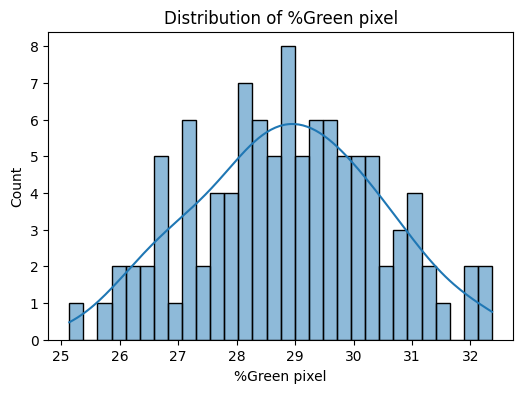

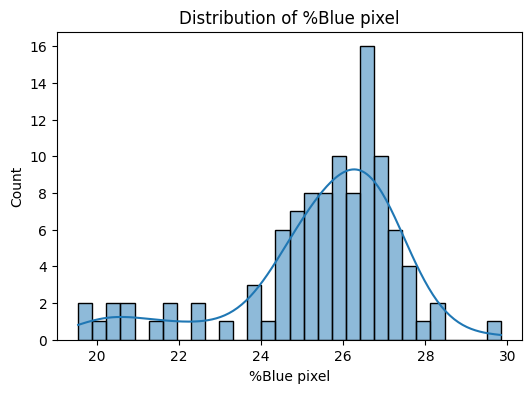

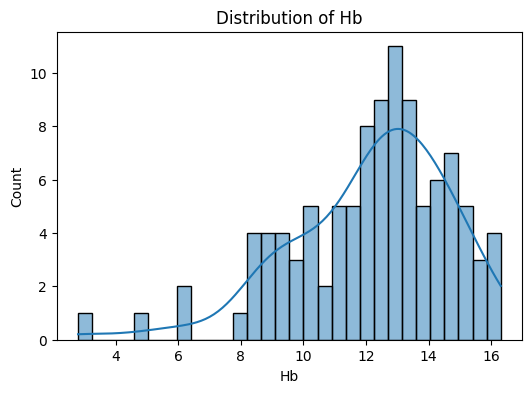

In [6]:
# Visualisasi distribusi fitur numerik
numeric_columns = ['%Red Pixel', '%Green pixel', '%Blue pixel', 'Hb']
for col in numeric_columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()

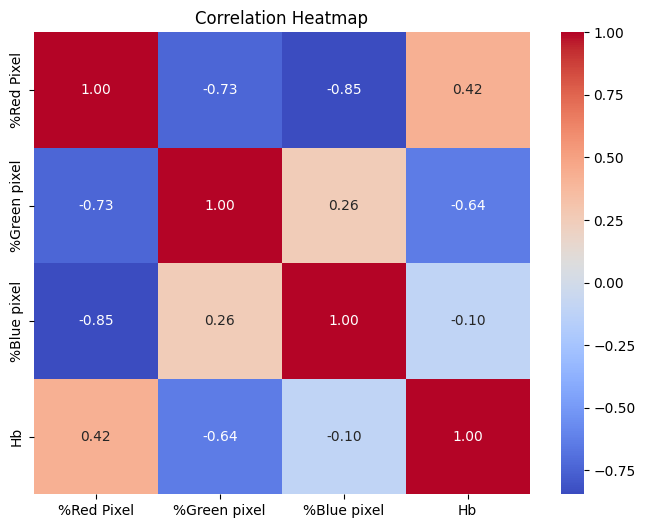

In [7]:
# Heatmap untuk melihat korelasi antar fitur numerik
plt.figure(figsize=(8, 6))
sns.heatmap(df[numeric_columns].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

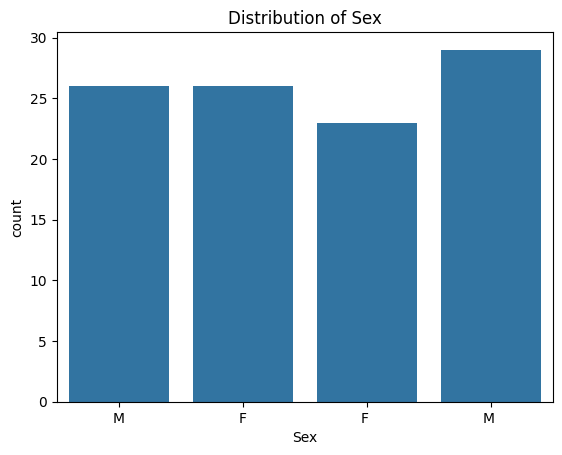

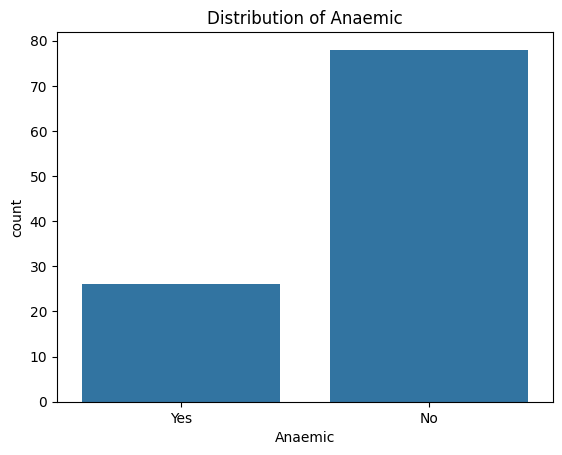

In [8]:
# Distribusi fitur kategorikal
sns.countplot(x='Sex', data=df)
plt.title('Distribution of Sex')
plt.show()

sns.countplot(x='Anaemic', data=df)
plt.title('Distribution of Anaemic')
plt.show()

# **Data Preparation**

In [9]:
# Encoding fitur kategorikal
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])
df['Anaemic'] = label_encoder.fit_transform(df['Anaemic'])

In [10]:
# Feature scaling
scaler = StandardScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

In [11]:
# Membagi dataset menjadi data training dan testing
X = df[['Sex', '%Red Pixel', '%Green pixel', '%Blue pixel', 'Hb']]
y = df['Anaemic']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# **Model Development**

In [12]:
# Model K-Nearest Neighbor
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

# Model Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Model Boosting Algorithm (AdaBoost)
ada_model = AdaBoostClassifier(n_estimators=50, random_state=42)
ada_model.fit(X_train, y_train)
y_pred_ada = ada_model.predict(X_test)

# **Evaluasi Model**

In [13]:
# Fungsi untuk mengevaluasi model
def evaluate_model(y_test, y_pred, model_name):
    print(f"Evaluation Metrics for {model_name}:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred))
    print("Recall:", recall_score(y_test, y_pred))
    print("F1 Score:", f1_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("-" * 50)

    # Kembalikan metrik untuk digunakan dalam pemilihan model terbaik
    return {
        "Model": model_name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred)
    }

# Evaluasi semua model
results = []
results.append(evaluate_model(y_test, y_pred_knn, "K-Nearest Neighbor"))
results.append(evaluate_model(y_test, y_pred_rf, "Random Forest"))
results.append(evaluate_model(y_test, y_pred_ada, "AdaBoost"))

# Memilih model terbaik berdasarkan F1 Score
best_model_metrics = max(results, key=lambda x: x['F1 Score'])
best_model_name = best_model_metrics["Model"]

# Tampilkan model terbaik
print("\nModel terbaik berdasarkan F1 Score:")
print(best_model_metrics)

Evaluation Metrics for K-Nearest Neighbor:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
 [[16  0]
 [ 0  5]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00         5

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21

--------------------------------------------------
Evaluation Metrics for Random Forest:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
 [[16  0]
 [ 0  5]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00         5

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00  

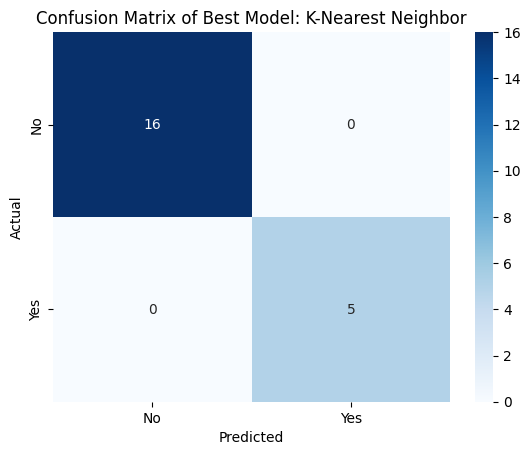

In [14]:
# Visualisasi Confusion Matrix untuk model terbaik
if best_model_name == "K-Nearest Neighbor":
    best_pred = y_pred_knn
elif best_model_name == "Random Forest":
    best_pred = y_pred_rf
else:
    best_pred = y_pred_ada

conf_matrix = confusion_matrix(y_test, best_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.title(f"Confusion Matrix of Best Model: {best_model_name}")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# **Testing Model**

In [17]:
# Tampilkan hasil prediksi dalam tabel
def display_prediction_results_simple(results_df):
    print("\nSample Testing Results:")
    print(results_df.to_string(index=False))

display_prediction_results_simple(results_df)


Sample Testing Results:
 Actual  Predicted
      1          1
      0          0
      0          0
      1          1
      0          0
      0          0
      0          0
      0          0
      1          1
      0          0
      0          0
      0          0
      0          0
      0          0
      0          0
      0          0
      0          0
      0          0
      0          0
      1          1
      1          1


# **Save Model**

In [18]:
import joblib

# Simpan model ke dalam file .pkl
joblib.dump(best_pred, 'best_model.pkl')
print("Model terbaik disimpan ke 'best_model.pkl'")

Model terbaik disimpan ke 'best_model.pkl'
